<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/Taitanic_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Different types of outliers**

One must distinguish between univariate and multivariate outliers. **Univariate** outliers (Univariate just means "one variable"), they are extreme values in the distribution of a specific variable,  for example, the comparison of the goal scores of Ronaldo or Messi with other average players ,we can see clearly it is incomparable and the margin will be very significant. whereas **multivariate** outliers are a combination of values in an observation that is unlikely. For example, a univariate outlier could be a human age measurement of 120 years or a temperature measurement in Antarctica of 50 degrees Celsius.

A multivariate outlier could be an observation of a human with a height measurement of 2 meters (in the 95th percentile) and a weight measurement of 50kg (in the 5th percentile). Both types of outliers can affect the outcome of an analysis but are detected and treated differently.

This notebook is going to cover the Univariate outliers:
- Visualize outliers
- Detect outliers
- Handle outliers




#**Univariate Outliers**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


In [116]:
df = pd.read_csv('train.csv')
print(df.columns)
df.head()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First : Visualize Outliers

A first and useful step in detecting univariate outliers is the visualization of a variables’ distribution. Typically, when conducting an EDA, this needs to be done for all interesting variables of a data set individually.

To receive a quick overview of all variables’ distributions, you can use a group plot. Be aware that variables can differ in scale, and adding all variables into one grid may lead to some hard to read charts. You can run df.describe() first to get an idea of each variable’s scale and then created three group plots for three different variable groups. Here is an example of medium scaled variables:

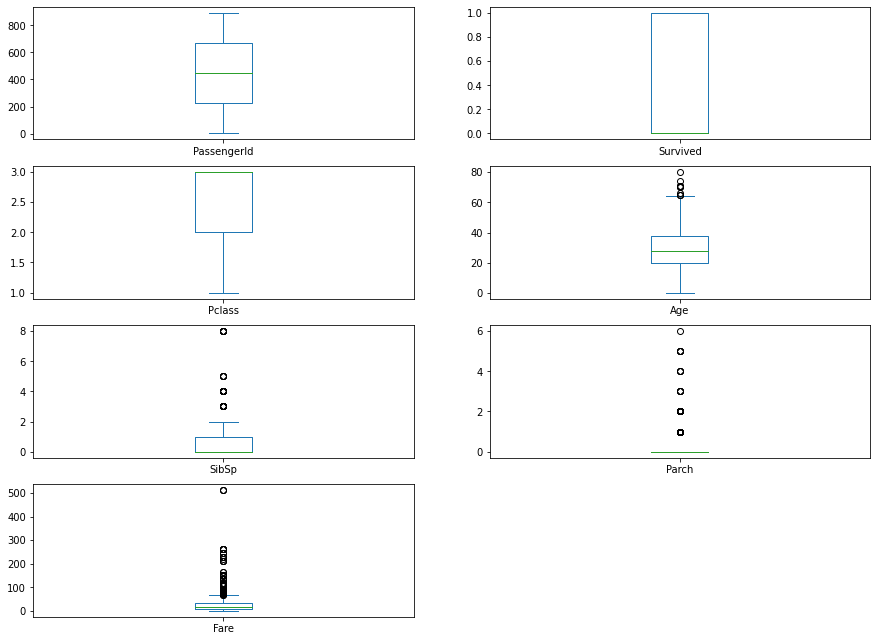

In [3]:
## boxplot all features in dataset
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Boxplot**

boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).

outliers appears above or below the minimum and maximum of the boxplot.

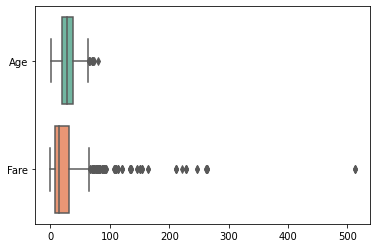

In [5]:
## seems like Age and Fare has unexpected mean and std
df_1 = df[['Age', 'Fare']]
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

**Histogram**

To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers.

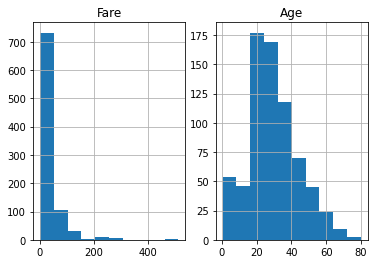

In [32]:
plt.subplot(1,2,1)
df['Fare'].hist()
plt.title('Fare')

plt.subplot(1,2,2)
df['Age'].hist()
plt.title('Age')


plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


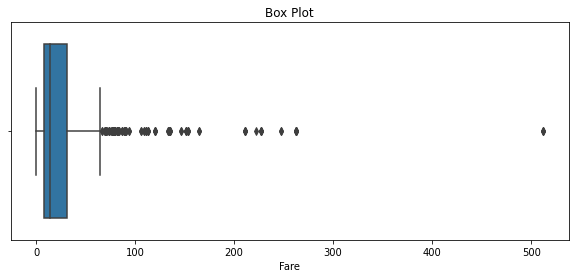

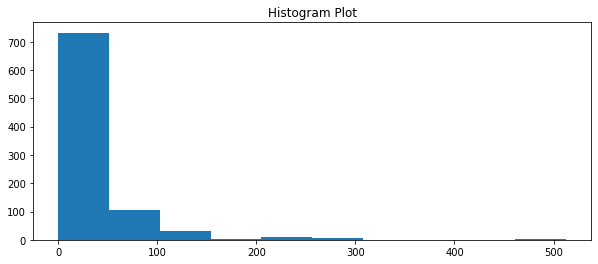

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


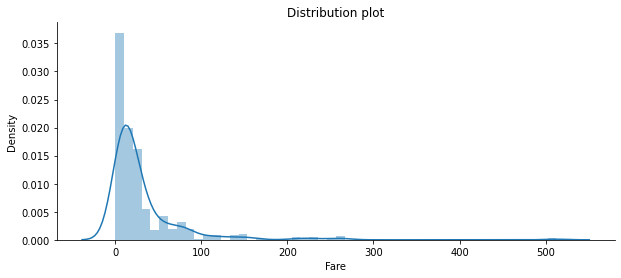

<Figure size 720x288 with 0 Axes>

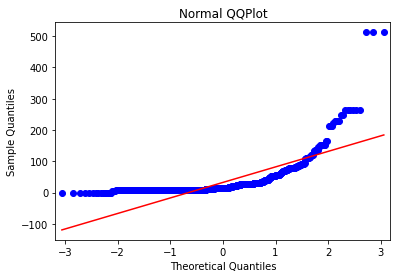

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


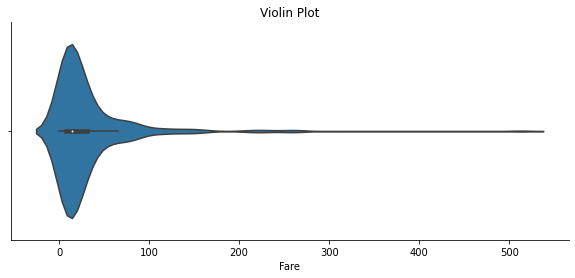

In [6]:
## Other different visulaization tools


def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['Fare'])

def violin_plots(df):
    plt.figure(figsize=(10, 4))
    sns.violinplot(df)
    plt.title("Violin Plot")
    sns.despine()
    plt.show()
violin_plots(df['Fare'])

Box plots are great to summarize and visualize the distribution of variables easily and quickly. However, they do not identify the actual indexes of the outlying observations. 

To decide on the right approach for your own data set, closely examine your variables’ distribution, and use your domain knowledge.

In the following, we will discuss some quantitative methods commonly used in statistics for the detection of univariate outliers.

## Second: Detect Outliers

Outliers can be discovered in various ways, including statistical methods, proximity-based methods, or supervised outlier detection

**1- Skewness**

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers

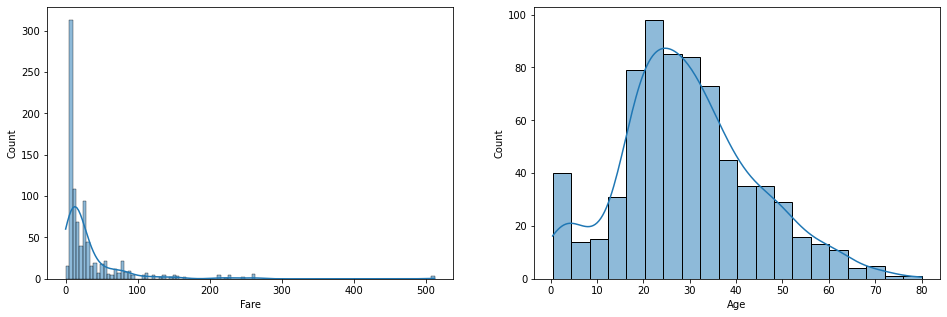

In [7]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['Fare'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Age'], kde=True)

plt.show()



From the graph, we can see that Age is almost the right fit for the normal distribution, or we can say it is almost forming the bell curve. Meanwhile, the other one is slightly skewed towards the right. Hence, we are gonna take Age for our further analysis.




We were lucky enough to spot the difference between a normal distribution and skewed distribution from the above graph, but sometimes, the graph might not give a clear understanding that we have the skew function from pandas which will give a higher positive value if the distribution seems to be skewed (Fare) otherwise it will return the quite lower value even in negative if it is not skewed at all (Age).



In [8]:
print(df['Fare'].skew())
print(df['Age'].skew())


4.787316519674893
0.38910778230082704


the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

from the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

**2- Using Tukey’s box plot/IQR method**

The interquartile range is a measure of statistical dispersion and is calculated as the difference between 75th and 25th percentiles. the Quartiles divide the data set into four equal parts. The values that separate parts are called the first, second, and third quartiles.


We will use the Interquartile Range to measure the limits of Outliers if:

- Data doesn’t follow a Normal Distribution or 
- Data is either right-skewed or left-skewed.

To find outliers, we can simply plot the box plot. Outliers are points that are outside of the minimum and maximum values, as seen in the image below.

The great advantage of Tukey’s box plot/IQR method is to find one outlier is **independent** of all other outliers.  

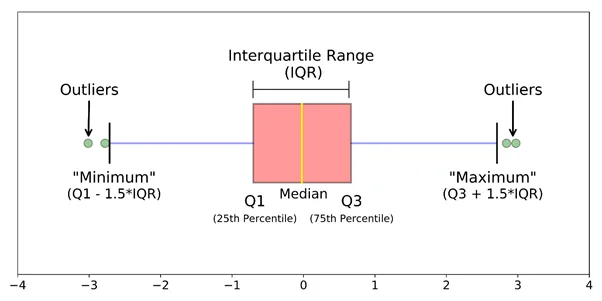

In [123]:
def extract_outliers_using_IQR (df, feature):

  Q1= df[feature].quantile(0.25)
  Q3= df[feature].quantile(0.75)

  IQR = Q3 - Q1

  Minimum_Boundry = Q1-(1.5*IQR)
  Maximum_Boundry = Q3+(1.5*IQR)

  Outliers= df[ (df[feature] <= Minimum_Boundry ) | (df[feature] >= Maximum_Boundry) ]
  print('No. of Ouliers of ', feature , len(Outliers))
  return Outliers


Outliers = extract_outliers_using_IQR (df,'Fare')
Outliers.head()
# Outliers = extract_outliers_using_IQR (df,'Age')
# Outliers.head()

No. of Ouliers of  Fare 116


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


**3 - Standard Deviation**

Standard deviation measures the amount of variation and dispersion of a set of values relative to the average value of the data, it shows the variability distribution of the data.

A high standard deviation indicates that the values are highly dispersed while a low standard deviation indicates that the variation or dispersion of the values is low.

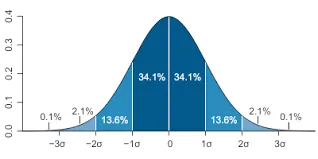

The very first step in this technique will be setting the upper and lower limit. This range stimulates that every data point will be regarded as an outlier out of this range. Let’s see the formulae for both upper and lower limits.

- Upper: Mean + 3 * standard deviation.
- Lower: Mean – 3 * standard deviation.

In [34]:
def extract_outliers_using_MeanandSTD (df, feature):

  mean=df[feature].mean()
  std= df[feature].std()

  upper_limit = mean + 3*std
  lower_limit = mean - 3*std

  Outliers= df[ (df[feature] < lower_limit ) | (df[feature] > upper_limit) ]
  print('No. of Ouliers =',len(Outliers))
  return Outliers


Outliers = extract_outliers_using_MeanandSTD (df,'Fare')
Outliers.head()
# Outliers = extract_outliers_using_MeanandSTD (df,'Age')
# Outliers.head()


No. of Ouliers = 20


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


**IQR vs STD**

You should use the interquartile range to measure the spread of values in a dataset when there are extreme outliers presentConversely, you should use the standard deviation to measure the spread of values when there are no extreme outliers present

The interquartile range and standard deviation share the following similarity:

- Both metrics measure the spread of values in a dataset.

However, the interquartile range and standard deviation have the following key difference:

- The interquartile range (IQR) is not affected by extreme outliers. For example, an extremely small or extremely large value in a dataset will not affect the calculation of the IQR because the IQR only uses the values at the 25th percentile and 75th percentile of the dataset.
- The standard deviation is affected by extreme outliers. For example, an extremely large value in a dataset will cause the standard deviation to be much larger since the standard deviation uses every single value in a dataset in its formula.


To illustrate why, consider the following dataset:

**Dataset**: 1, 4, 8, 11, 13, 17, 19, 19, 20, 23, 24, 24, 25, 28, 29, 31, 32

Earlier in the article we calculated the following metrics for this dataset:

- IQR: 14.5
- Standard Deviation: 9.25 
However, consider if the dataset had one extreme outlier:

**Dataset**: 1, 4, 8, 11, 13, 17, 19, 19, 20, 23, 24, 24, 25, 28, 29, 31, 32, 378

We could use a calculator to find the following metrics for this dataset:

- IQR: 15
- Standard Deviation: 85.02
Notice that the interquartile range barely changes when an outlier is present, while the standard deviation increase from 9.25 all the way to 85.02.

**4- Z scores**


We offen say that outliers often tend to change the mean and standard deviation of a data set thus causing problems for statistical analysis.

So to detect Ouliers mathematically we can use user Z-score.
Z-Score = (x-mean)/standard deviation

Since formula use both mean and standard deviation, so if outlier do exists does this not effect z-score value?

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

This method assumes that the variable has a Gaussian/Normal distribution. It represents the number of standard deviations an observation is away from the mean.

Z-Score only works with:

- Data which is completely or close to normally distributed

this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is **dependent** on other outliers as every observation directly affects the mean.

**P.S.** all the data points 3 or -3 standard deviations away from the mean are outliers.

Following a common rule,  if zscore > C, where C is usually set to 3, the observation is marked as an outlier. This rule stems from the fact that if a variable is normally distributed, 99.7% of all data points are located 3 standard deviations around the mean.







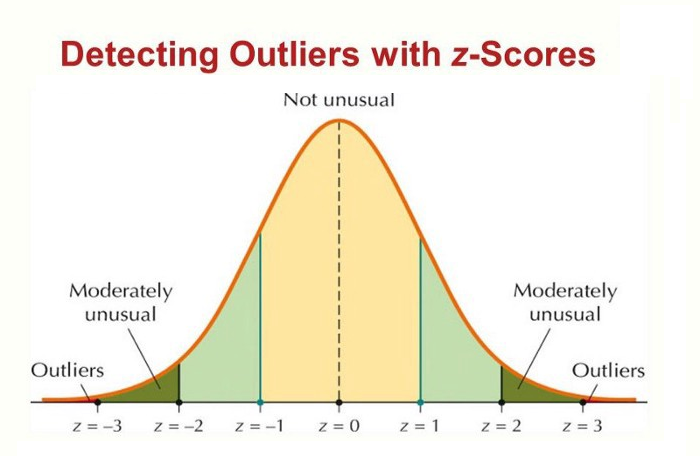



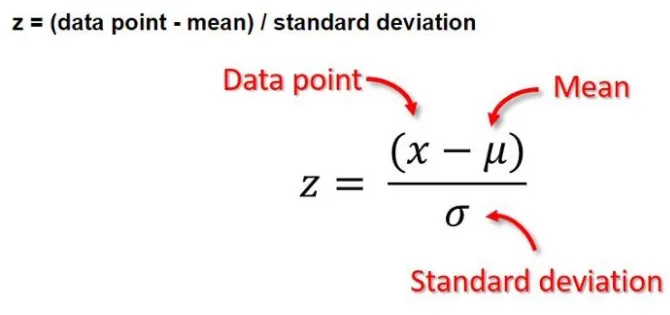

In [122]:
from scipy import stats

  ##using scipy Library

def detect_outliers_using_zscore (df, feature):
  print('***Z-score - scipy Library***')
  zscore_for_all_datapoints =np.abs(stats.zscore(df[feature]))
  threshold=3
  df=df[(zscore_for_all_datapoints> 3)]
  print('No. Outliers of ', feature ,len(df))
  return df

df_zscore = df.copy()
df_zscore = detect_outliers_using_zscore(df_zscore, 'Age')
# df_zscore.head()


  
## Z-score - Hard Coding
def Zscore_outlier(df):
    print('\n***Z-score -  Hard Coding***')
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("No. Outliers:",len(out))
    print("Outliers:",out)

df_zscore = df.copy()
Zscore_outlier(df_zscore['Age'])


***Z-score - scipy Library***
No. Outliers of  Age 0

***Z-score -  Hard Coding***
No. Outliers: 2
Outliers: [80.0, 74.0]


**Powerful Models**

## Third: Handle Outliers

**1- Keep Outliers**

Keeping outliers is a good decision if the outliers rightfully belong to the distribution of interest.

However, in the case where you are not able to easily identify whether or not an extreme value is a part of the population of interest or not, be aware that keeping them will most likely distort the results of your actual task: e.g. leading to a rejection of the null hypothesis or an under/over-optimistic prediction.


**2- Remove Outliers**

This is a very intuitive and straightforward strategy. Removing outliers are efficient if outliers corrupt the estimation of the distribution parameters.

When you decide to remove outliers, document the excluded data points and explain your reasoning. You must be able to attribute a specific cause for removing outliers.

Another approach is to perform the analysis with and without these observations and discuss the differences. Comparing results in this manner is particularly useful when you’re unsure about removing an outlier.



In [13]:
## removing outliers
def drop_outliers_IQR(df , feature):

  Q1= df[feature].quantile(0.25)
  Q3= df[feature].quantile(0.75)

  IQR = Q3 - Q1

  Minimum_Boundry = Q1-(1.5*IQR)
  Maximum_Boundry = Q3+(1.5*IQR)
  
  print("Old Shape: ", df.shape)
  
  # Upper bound
  upper = np.where(df[feature] >= Maximum_Boundry)
  # Lower bound
  lower = np.where(df[feature] <= Minimum_Boundry)
  
  ''' Removing the Outliers '''
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  
  print("New Shape: ", df.shape)

df_drop_outliers= df.copy()
drop_outliers_IQR(df_drop_outliers , 'Fare')


Old Shape:  (891, 12)
New Shape:  (775, 12)


In [82]:
# def drop_outliers_STD (df, feature):

#   mean=df[feature].mean()
#   std= df[feature].std()

#   upper_limit = mean + 3*std
#   lower_limit = mean - 3*std

#   Outliers= df[ (df[feature] < lower_limit ) | (df[feature] > upper_limit) ]

#   print("Old Shape: ", df.shape)
#   df.drop(Outliers.index, inplace = True)
#   print("New Shape: ", df.shape)


# df_drop_outliers= df.copy()
# drop_outliers_STD (df_drop_outliers,'Age')


Old Shape:  (891, 12)
New Shape:  (889, 12)


In [15]:
# from scipy import stats

# ## Z-score - scipy Library
# def drop_outliers_using_zscore (df, feature):

#   print("Old Shape: ", df.shape)
#   zscore_for_all_datapoints =np.abs(stats.zscore(df[feature]))
#   threshold=3
#   df=df[(zscore_for_all_datapoints< 3)]
#   print("New Shape: ", df.shape)

# df_drop_outliers= df.copy()
# drop_outliers_using_zscore(df_drop_outliers, 'Fare')



Old Shape:  (891, 12)
New Shape:  (871, 12)


However, the biggest issue with removing outliers is the loss of information. Looking at **the nullity matrix** of the dataset , we see that removing all the outliers (assuming that they are 0), will potentially reduce a lot of observations in our dataset.

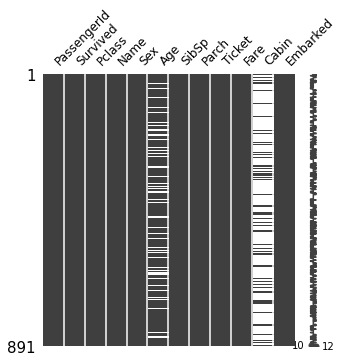

In [16]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df , figsize=(5,5), fontsize=12)

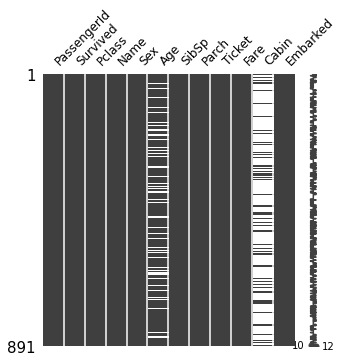

In [17]:
msno.matrix(df_drop_outliers , figsize=(5,5), fontsize=12)


This happens when all univariate outliers are removed for each variable. When you are working with a dataset like this, it would not be wise to remove the entire row or column with all these outliers/missing data.

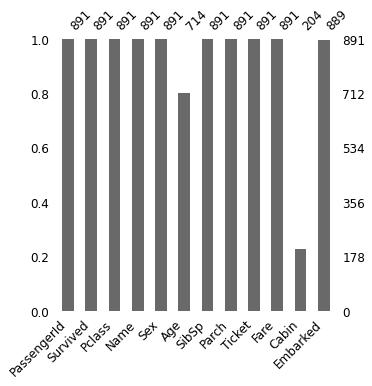

In [18]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df_drop_outliers , figsize=(5,5), fontsize=12)

**2- Impute/Replace Outliers With The Mean, Median, Mode, or other Values**


- There are several imputation techniques. One common technique used is Common Value Imputation like mean or median or mode.

- However, in doing so, we might under or overestimate it. In other words, we could be inducing biases in our dataset, which defeats the purpose of us treating outliers and missing data in the first place.

In [79]:
def Replace_outliers_Mean (_df , feature):
  Q1 = _df[feature].quantile(0.25)
  Q3 = _df[feature].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  _df[feature] =np.where(_df[feature]>upper_whisker,_df[feature].mean(),np.where(_df[feature]<lower_whisker,_df[feature].mean(),_df[feature]))

df_Capping_outliers= df.copy()

Replace_outliers_Mean(df_Capping_outliers, 'Age')
Replace_outliers_Mean(df_Capping_outliers, 'Fare')


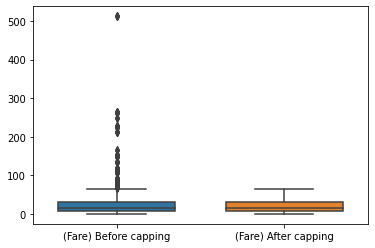

In [80]:
_df = pd.Series(df['Fare'], name="(Fare) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Fare'], name="(Fare) After capping"))
sns.boxplot(data=_df , width = 0.7) 

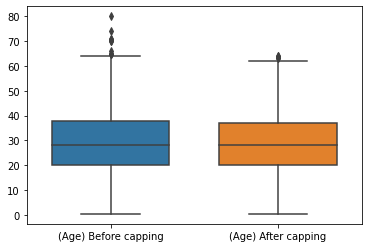

In [77]:
_df = pd.Series(df['Age'], name="(Age) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Age'], name="(Age) After capping"))
sns.boxplot(data=_df , width = 0.7) 

**4- Flooring And Capping outliers (Winsorize)**

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

- Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area. 

- Winsorization is essentially similar to imputing, but instead of imputing extreme values with mean, median, mode, min or max values, we imput those outliers with our chosen percentile.

* For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.


- This technique is used when you can assume that all outliers express the same behaviors or patterns, meaning the model wouldn’t learn anything new by allowing the outliers to remain. 

In [22]:
df.shape

(891, 12)

In [126]:
def Capping_outliers_IQR (_df , feature):
  Q1 = _df[feature].quantile(0.25)
  Q3 = _df[feature].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  _df[feature] =np.where(_df[feature]>upper_whisker,upper_whisker,np.where(_df[feature]<lower_whisker,lower_whisker,_df[feature]))

df_Capping_outliers= df.copy()

Capping_outliers_IQR(df_Capping_outliers, 'Age')
Capping_outliers_IQR(df_Capping_outliers, 'Fare')


Inference: As we did capping, no data was lost, and we still have 891 rows

In [24]:
df_Capping_outliers.shape

(891, 12)

we can now use the boxplot or other outliers identification method to check if there is still the presence of outliers.

the boxplot below shows no presence of outliers.

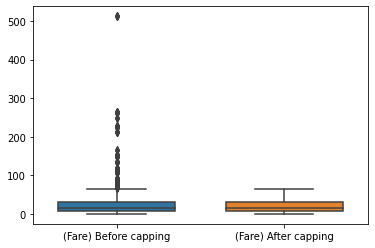

In [59]:
_df = pd.Series(df['Fare'], name="(Fare) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Fare'], name="(Fare) After capping"))
sns.boxplot(data=_df , width = 0.7) 

 Now, if we compare the minimum and maximum values before outlier removal and after, we can see that the minimum value didnt change , as there was any outlier less than minumum , however the maximum value is decreased.
 Taking into consideration that the mean and std valuse didnt change as well.

In [70]:
df['Fare'].describe()
# df['Age'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
df_Capping_outliers['Fare'].describe()
# df_Capping_outliers['Age'].describe()


count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

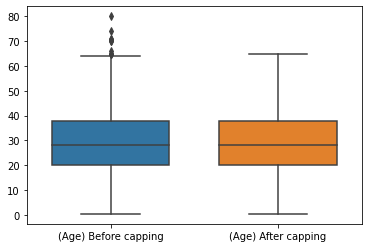

In [127]:
_df = pd.Series(df['Age'], name="(Age) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Age'], name="(Age) After capping"))
sns.boxplot(data=_df , width = 0.7) 

In [63]:
# def Capping_outliers_usingSTD (df , feature):
#   upper_limit = df[feature].mean() + 3*df[feature].std()
#   lower_limit = df[feature].mean() - 3*df[feature].std()
   
#   ## the basic syntax is as, np.where(condition, True, False) 
#   ## if the condition is true, then that data point will be getting the upper limit value (within range) 
#   ##if not, it will go to check the lower limit, and if that’s true, then it will give that data point lower limit value (within range).

#   df[feature] = np.where( df[feature]>upper_limit, upper_limit, np.where(  df[feature]<lower_limit, lower_limit,df[feature] ))


# df_Capping_outliers= df.copy()

# Capping_outliers_usingSTD(df_Capping_outliers, 'Age')
# Capping_outliers_usingSTD(df_Capping_outliers, 'Fare')


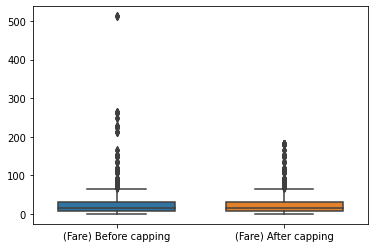

In [64]:
# _df = pd.Series(df['Fare'], name="(Fare) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Fare'], name="(Fare) After capping"))
# sns.boxplot(data=_df , width = 0.7) 

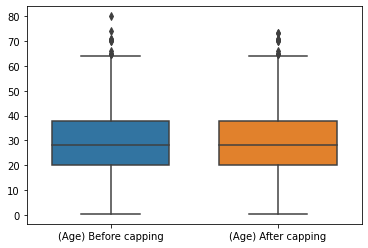

In [65]:
# _df = pd.Series(df['Age'], name="(Age) Before capping").to_frame().join(pd.Series(df_Capping_outliers['Age'], name="(Age) After capping"))
# sns.boxplot(data=_df , width = 0.7) 

**Comparing capping using IQR and STD , we can SEE the technique using IQR is performing so much better**

# **Multivariate Outliers**

A multivariate outlier is an unusual combination of values in an observation across several variables. For example, it could be a human with a height measurement of 2 meters (in the 95th percentile) and weight measurement of 50kg (in the 5th percentile).



## **Visualize outliers**

A common way to plot multivariate outliers is the scatter plot. Keep in mind that visualizing multivariate outliers across more than two variables is not feasible in a 2D space. Therefore, we will stick to outliers found across two variables for visualization — so-called bi-variate outliers.

The scatterplot visualizes the relationship between two (numerical) variables. In a scatterplot, every observation is plotted as a point with two coordinates (X,Y) that represent two variables. Here, for example, X represents the value for variable 1 and Y the value for variable 2.




**6-DBSCan**

Another way to find the outliers is DBSCAN which uses clustering. In this method, we calculate the distance between points (the Euclidean distance or some other distance) and look for points which are far away from others.

As an example, we  select the age and fare from the  dataset and look for the outliers in the data frame.



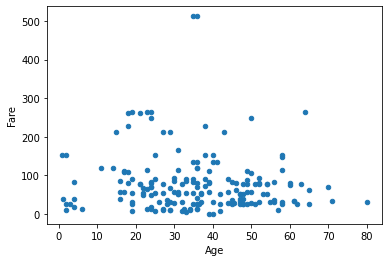

In [111]:
# First, we are going to plot the data frame and check if there are some values which may be considered to be outliers.

df_DBSCAN = df.copy()
df_DBSCAN= df_DBSCAN.dropna()
ageAndFare = df_DBSCAN[["Age", "Fare"]]
ageAndFare.plot.scatter(x = "Age", y = "Fare")

We see two points with a large value of the “fare” attribute.

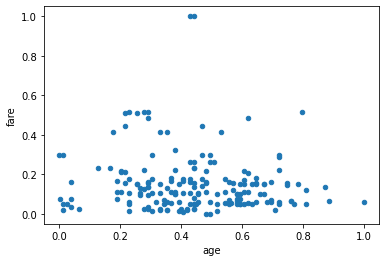

In [112]:
#???
# We also see that both variables have different scales. Because of that, the distance would be dominated by the fare variable. 
# We don’t want that so we must normalize variables.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
ageAndFare.plot.scatter(x = "age", y = "fare")

DBSCAN is going to assign points to clusters and return the labels of clusters. If it cannot assign the value to any cluster (because it is an outlier), it returns -1. In this example, it may also return a cluster which contains only two points, but for the sake of demonstration I want -1 so I set the minimal number of samples in a cluster to 3.

In [113]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)


clusters = outlier_detection.fit_predict(ageAndFare)

clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

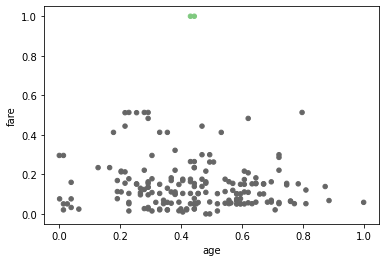

In [114]:
# plot the dataset and use the cluster identifier to color the points.
from matplotlib import cm
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

**5- Isolation Forest**

In [146]:
from sklearn.ensemble import IsolationForest


def detect_outliers_IsolationForest(df, feature):
    _IsolationForest = IsolationForest( random_state = 1, contamination= 'auto')
    preds = _IsolationForest.fit_predict(df[feature].values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

df_if1 =df.copy()
df_iF1 = df_if1.dropna()
detect_outliers_IsolationForest(df_if1,'Fare')

features = [ 'Fare']

## We'll do a simple drop null for now
df_if2 = df.copy()
df_if2 = df_if2.dropna()

## Create a training-test set
X = df_if2[features]

## Fit Model
clf = IsolationForest(n_estimators=50)
clf.fit(X)

## Get Scores
df_if2['scores'] = clf.decision_function(X)
df_if2['anomaly'] = clf.predict(X)

## Get Anomalies
outliers=df_if2.loc[df_if2['anomaly']==-1]

len(outliers)

 1    706
-1    185
Name: cluster, dtype: int64


44

Finally, it is important to note that there are several other ways of detecting univariate and multivariate outliers. Other popular methods are k-nearest neighbours,  just to name a few. There is no right or wrong method, but one might be more appropriate than another for your data set. 


When deciding on the outlier detection method you would like to use, I recommend basing your decision on:
- the data’s distribution, 
- sample size, and 
- the number of dimensions.

**Resources**

- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

- https://learn.365datascience.com/courses/learn-machine-learning-process-a-z/treating-outliers/

- https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

- https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

- https://www.statology.org/interquartile-range-vs-standard-deviation/#:~:text=The%20interquartile%20range%20(IQR)%20is,75th%20percentile%20of%20the%20dataset.


- https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

- https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
- https://www.analyticsvidhya.com/blog/2023/01/learning-different-techniques-of-anomaly-detection/

- https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

There are so many ways to detect outliers , the most famous are :
- IQR (skewed data)
- Z-score (normal distribution)

To handle Outliers , we can :
- Cap and flooer by IQR 